# 1. Decoding latency

Mixtral-offloading has a much smaller latency when batch_size = 1. But when batch_size > 4, it comes slower than FlexGen.
The reason is it needs to do multiple loading and offloading in one layer.

When batch_size >= 64, mixtral-offloading is out of memory.

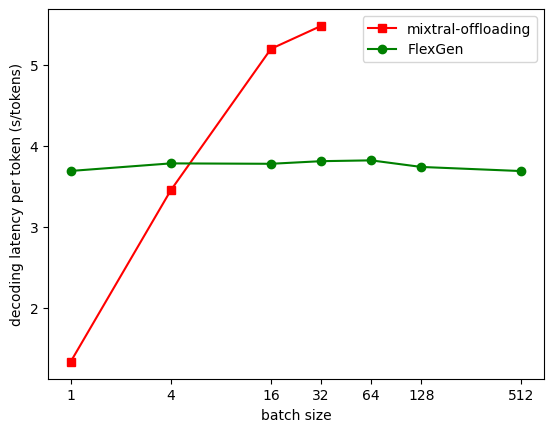

In [14]:
import matplotlib.pyplot as plt

x = [1, 3, 5, 6, 7, 8, 10]
xtick = [1, 4, 16, 32, 64, 128, 512]
plt.xticks(x, xtick)
k1 = [1.3309, 3.4505, 5.1977, 5.4808, None, None, None]
k2 = [3.6895, 3.783, 3.778, 3.8103, 3.8203, 3.739, 3.688]
plt.plot(x, k1, 's-', color='r', label="mixtral-offloading")
plt.plot(x, k2, 'o-', color='g', label="FlexGen")
plt.xlabel("batch size")
plt.ylabel("decoding latency per token (s/tokens)")
plt.legend(loc="best")
plt.show()

# 2. Prefill latency

In prefill stage, sequence length > 1, so active_experts > 2. Similarly to the large batch size, this means Mixtral-offloading needs to repeat loading and offloading in one single layer.

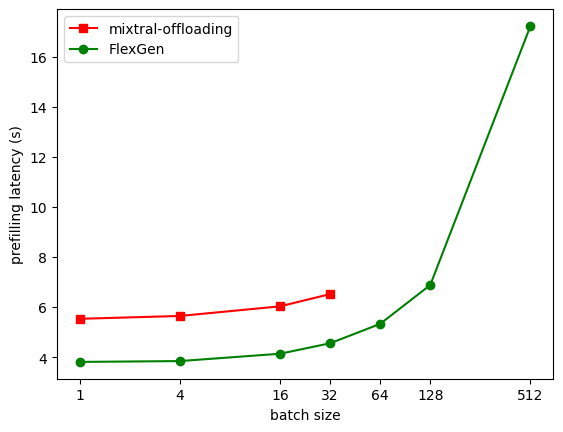

In [15]:
import matplotlib.pyplot as plt

x = [1, 3, 5, 6, 7, 8, 10]
xtick = [1, 4, 16, 32, 64, 128, 512]
plt.xticks(x, xtick)
k1 = [5.5315, 5.6455, 6.03, 6.5192, None, None, None]
k2 = [3.809, 3.843, 4.136, 4.554, 5.329, 6.883, 17.236]
plt.plot(x, k1, 's-', color='r', label="mixtral-offloading")
plt.plot(x, k2, 'o-', color='g', label="FlexGen")
plt.xlabel("batch size")
plt.ylabel("prefilling latency (s)")
plt.legend(loc="best")
plt.show()

# 3. Decoding throughput

The result is corresponding to the part 1 (decoding latency).

The second figure shows an enlarged view of the part from batch size 1 to 32 in the first figure.

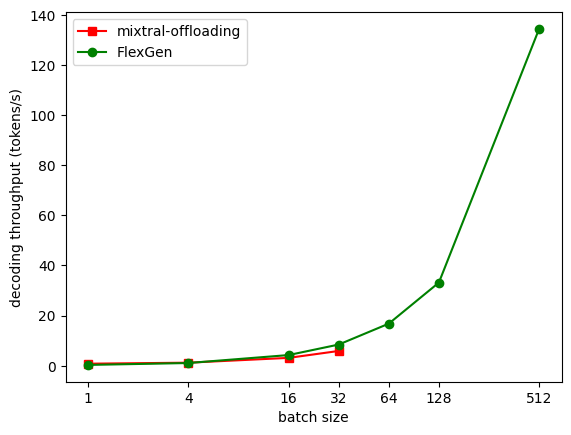

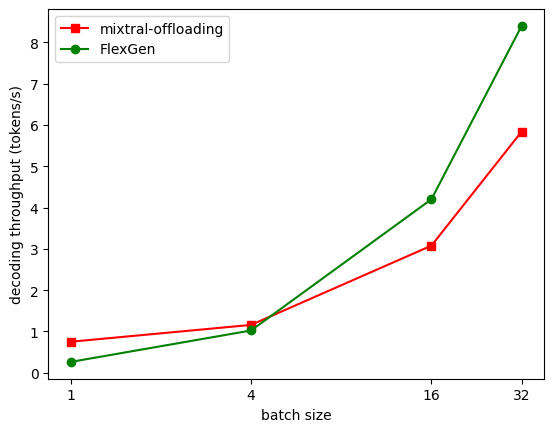

In [16]:
import matplotlib.pyplot as plt

x = [1, 3, 5, 6, 7, 8, 10]
xtick = [1, 4, 16, 32, 64, 128, 512]
plt.xticks(x, xtick)
k1 = [0.7513, 1.1592, 3.0782, 5.8385, None, None, None]
k2 = [0.263, 1.024, 4.201, 8.398, 16.752, 33.156, 134.454]
plt.plot(x, k1, 's-', color='r', label="mixtral-offloading")
plt.plot(x, k2, 'o-', color='g', label="FlexGen")
plt.xlabel("batch size")
plt.ylabel("decoding throughput (tokens/s)")
plt.legend(loc="best")
plt.show()


x = [1, 3, 5, 6]
xtick = [1, 4, 16, 32]
plt.xticks(x, xtick)
k1 = [0.7513, 1.1592, 3.0782, 5.8385]
k2 = [0.263, 1.024, 4.201, 8.398]
plt.plot(x, k1, 's-', color='r', label="mixtral-offloading")
plt.plot(x, k2, 'o-', color='g', label="FlexGen")
plt.xlabel("batch size")
plt.ylabel("decoding throughput (tokens/s)")
plt.legend(loc="best")
plt.show()

Conclusion:

The mixtral-offloading performs well at small batch size (batch size = 1) in the decoding stage. If batch size or sequence length is large, it will be quite slow.